# 边缘检测 cv2.Canny() (多阶段算法)
边缘是什么？边缘就是灰度值变化较大的的像素点的集合。一道黑边一道白边中间就是边缘，它的灰度值变化是最大的，在图像中，用梯度来表示灰度值的变化程度和方向。

## 步骤一：消噪
* 高斯分布非必须，图像足够清晰，你一开始通过灰度阈值进行图像分割之后得到二值图就可以直接拿来做边缘检测了，高斯或者中值滤波什么的在灰度阈值分割之前做一下

5X5高斯消噪
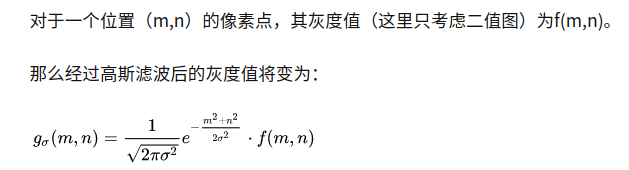

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt\

img = cv2.imread('messi0.jpg')
blur = cv2.GaussianBlur(img,(5,5),0)

cv2.imshow('gasuss',blur)
cv2.waitKey(0)&0xFF == ord('q')
cv2.destroyAllWindows()

# 步骤二：增强梯度
然后使用Sobel核在水平和垂直方向上对平滑的图像进行滤波，以在水平方向（）和垂直方向（）上获得一阶导数。从这两张图片中，我们可以找到每个像素的边缘渐变和方向
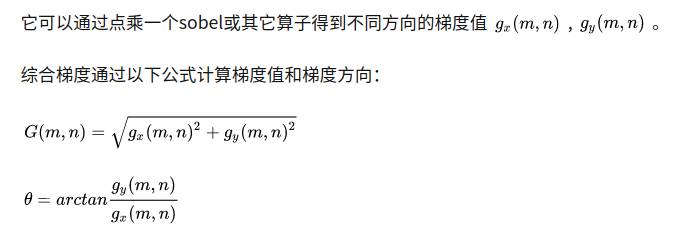

# 步骤三：过滤非最大值 
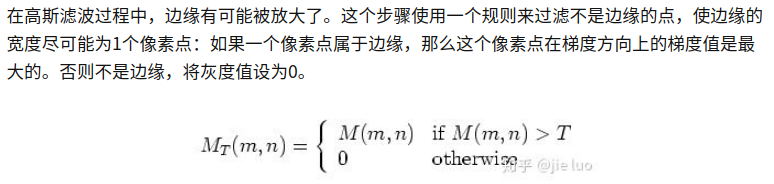

# 步骤四：滞后阀值（使用上下阈值来检测边缘 ）
该阶段确定哪些边缘全部是真正的边缘，哪些不是。为此，我们需要两个阈值minVal和maxVal。强度梯度大于maxVal的任何边缘必定是边缘，而小于minVal的那些边缘必定是非边缘，因此将其丢弃。介于这两个阈值之间的对象根据其连通性被分类为边缘或非边缘。如果将它们连接到“保证边缘”像素，则将它们视为边缘的一部分。否则，它们也将被丢弃。
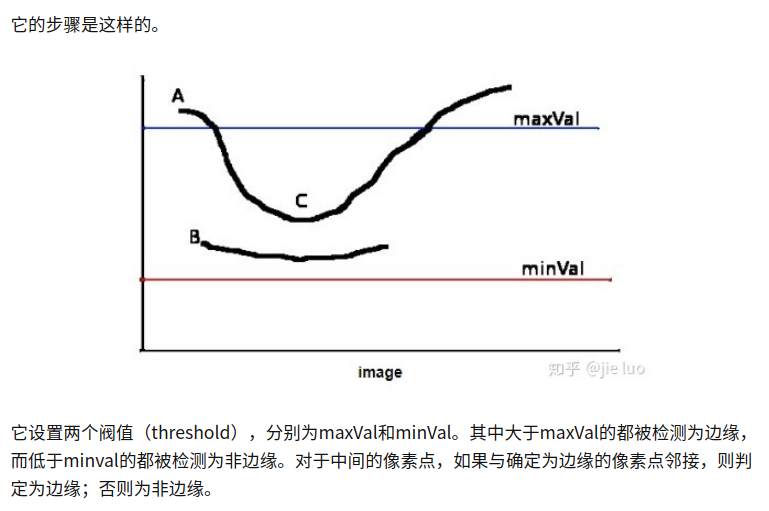

#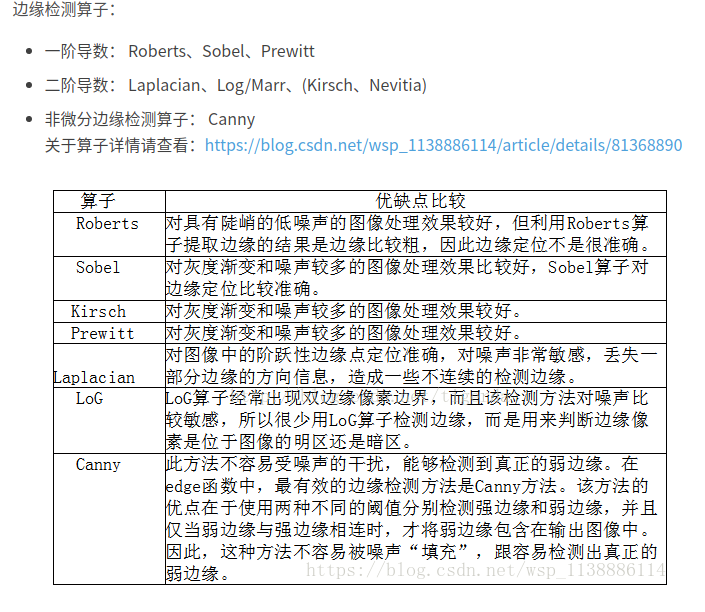

# Canny Edge Detection in OpenCV

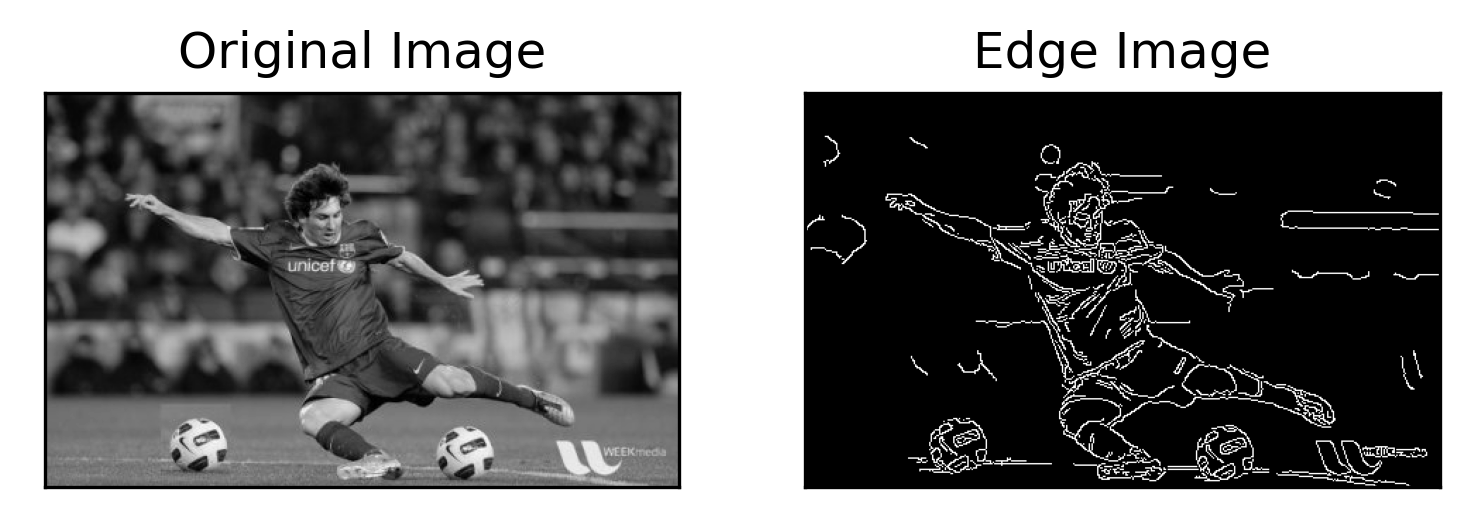

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import matplotlib
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率

img = cv2.imread('messi0.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
cv2.imshow('Original Image',img)
cv2.imshow('Edge Image',edges)
cv2.waitKey(0)&0xFF == 27
cv2.destroyAllWindows()

## 练习 
编写一个小应用程序以找到Canny边缘检测，该检测的阈值可以使用两个跟踪栏进行更改。这样，您可以了解阈值的影响。

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# this function is needed for the createTrackbar step downstream
def nothing(x):
    pass

# read the experimental image
img = cv2.imread('/home/cxking/python_work/OpenCV/messi1.jpg', 0)

# create trackbar for canny edge detection threshold changes
cv2.namedWindow('canny')

# add ON/OFF switch to "canny"
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'canny', 0, 1, nothing)

# add lower and upper threshold slidebars to "canny"
cv2.createTrackbar('lower', 'canny', 0, 255, nothing)
cv2.createTrackbar('upper', 'canny', 0, 255, nothing)

# Infinite loop until we hit the escape key on keyboard
while(1):

    # get current positions of four trackbars
    lower = cv2.getTrackbarPos('lower', 'canny')
    upper = cv2.getTrackbarPos('upper', 'canny')
    s = cv2.getTrackbarPos(switch, 'canny')

    if s == 0:
        edges = img
    else:
        edges = cv2.Canny(img, lower, upper)

    # display images
    cv2.imshow('original', img)
    cv2.imshow('canny', edges)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:   # hit escape to quit
        break

cv2.destroyAllWindows()
